In [0]:
#Importing spark session to create a session on spark

from pyspark.sql import SparkSession

In [0]:
# Defining the session instanciating as spark
# Also I've decited to call it analysis. 

spark = SparkSession.builder.appName('Analysis').getOrCreate()

In [0]:
# Installing python library to access twitter API, AFinn lexicon,
# matplotlib 3.2 version and jinja2 (debuging plots on Databricks)

In [0]:
pip install tweepy 

Python interpreter will be restarted.
Collecting tweepy
 Downloading tweepy-3.10.0-py2.py3-none-any.whl (30 kB)
Requirement already satisfied: requests[socks]>=2.11.1 in /databricks/python3/lib/python3.7/site-packages (from tweepy) (2.22.0)
Requirement already satisfied: six>=1.10.0 in /databricks/python3/lib/python3.7/site-packages (from tweepy) (1.14.0)
Collecting requests-oauthlib>=0.7.0
 Downloading requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
Collecting oauthlib>=3.0.0
 Downloading oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.7/site-packages (from requests[socks]>=2.11.1->tweepy) (2020.6.20)
Requirement already satisfied: idna<2.9,>=2.5 in /databricks/python3/lib/python3.7/site-packages (from requests[socks]>=2.11.1->tweepy) (2.8)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /databricks/python3/lib/python3.7/site-packages (from requests[socks]>=2.11.1->tweepy) (1.25.8)
Requirement already satisfied: chardet<3.1.0,>=3.0.2 in /usr/lib/python3/dist-packages (from requests[socks]>=2.11.1->tweepy) (3.0.4)
Requirement already satisfied: PySocks!=1.5.7,>=1.5.6 in /databricks/python3/lib/python3.7/site-packages (from requests[socks]>=2.11.1->tweepy) (1.7.1)
Installing collected packages: oauthlib, requests-oauthlib, tweepy
Successfully installed oauthlib-3.1.0 requests-oauthlib-1.3.0 tweepy-3.10.0
Python interpreter will be restarted.

In [0]:
pip install afinn

Python interpreter will be restarted.
Collecting afinn
 Downloading afinn-0.1.tar.gz (52 kB)
Building wheels for collected packages: afinn
 Building wheel for afinn (setup.py): started
 Building wheel for afinn (setup.py): finished with status 'done'
 Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53449 sha256=b4ec44068b4c3794a609459f6b3486b3b5858e0c80b5c99ab68cc7cedc1d853d
 Stored in directory: /home/root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn
Installing collected packages: afinn
Successfully installed afinn-0.1
Python interpreter will be restarted.

In [0]:
pip install matplotlib==3.2.2

Python interpreter will be restarted.
Collecting matplotlib==3.2.2
 Downloading matplotlib-3.2.2-cp37-cp37m-manylinux1_x86_64.whl (12.4 MB)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.7/site-packages (from matplotlib==3.2.2) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.7/site-packages (from matplotlib==3.2.2) (2.4.6)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.7/site-packages (from matplotlib==3.2.2) (2.8.1)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.7/site-packages (from matplotlib==3.2.2) (1.1.0)
Requirement already satisfied: numpy>=1.11 in /databricks/python3/lib/python3.7/site-packages (from matplotlib==3.2.2) (1.18.1)
Requirement already satisfied: six in /databricks/python3/lib/python3.7/site-packages (from cycler>=0.10->matplotlib==3.2.2) (1.14.0)
Requirement already satisfied: setuptools in /usr/local/lib/python3.7/dist-packages (from kiwisolver>=1.0.1->matplotlib==3.2.2) (45.2.0)
Installing collected packages: matplotlib
 Attempting uninstall: matplotlib
 Found existing installation: matplotlib 3.1.3
 Not uninstalling matplotlib at /databricks/python3/lib/python3.7/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-f633dbcb-5746-44a4-8fe0-c1e86ac39fc5
 Can't uninstall 'matplotlib'. No files were found to uninstall.
Successfully installed matplotlib-3.2.2
Python interpreter will be restarted.

In [0]:
pip install Jinja2

Python interpreter will be restarted.
Collecting Jinja2
 Downloading Jinja2-2.11.3-py2.py3-none-any.whl (125 kB)
Collecting MarkupSafe>=0.23
 Downloading MarkupSafe-1.1.1-cp37-cp37m-manylinux2010_x86_64.whl (33 kB)
Installing collected packages: MarkupSafe, Jinja2
Successfully installed Jinja2-2.11.3 MarkupSafe-1.1.1
Python interpreter will be restarted.

In [0]:
#  Importing libraries necessaries to work on. 
#  All of them are explained on the code use

from pyspark.sql.types import *
from pyspark import SparkFiles
from pyspark.sql import Row
from pyspark.sql.functions import monotonically_increasing_id, expr
from pyspark.sql.functions import col, lower, regexp_replace, split
from pyspark.sql.functions import mean, udf
from pyspark.ml.feature import MinMaxScaler, RegexTokenizer
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans 
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import ClusteringEvaluator
import tweepy as tw
import pandas as pd
from datetime import datetime, timedelta
import requests
import numpy as np
from afinn import Afinn
import matplotlib.pyplot as plt

In [0]:
# 1st analysis Crypto Covid

In [0]:
# 7 Coins to analize (These strings will be passed to kraken prices collection)

pairs = ["BTCEUR","ETHEUR","XMREUR","XRPEUR","ADAEUR",
         "XTZEUR","LTCEUR"]

In [0]:
# These pairs are requiered to request data.

long_pairs = ["XXBTZEUR","XETHZEUR","XXMRZEUR","XXRPZEUR","ADAEUR", "XTZEUR","XLTCZEUR"]

In [0]:
def collect_price(pair,long_pair):
  
  """Collecting date and price of asset 
  iterating through the dictionary obtained, json 
  format is been read and accesses with the first key
  results and it's respective long_pair of each asset.
  The date is the first item in each dictionary, it is
  collected in a variable and transformed from 
  10 digits timestamp to string for better interpretation.
  The same process of collection is made with the 4th item 
  that is the price at close.
  A variable dataframe is instanciated for date and price,
  iteraing each value as row in it's respective frame.
  For the purpose of joinin the frames a column is made on
  them called "id" with the same values on them, then with an 
  outer join, and droping "id" that is the base, the result_df
  that is been returned is the frame of the coin, with dates 
  and prices at close."""
  
  coin = requests.get(f"https://api.kraken.com/0/public/OHLC?pair={pair}&interval=1440")
    
  coin_ohlc = coin.json()["result"][long_pair]
  
  date = [item[0] for item in coin_ohlc]
  date = [datetime.utcfromtimestamp(item).strftime('%Y-%m-%d') for item in date]
  prices = [item[4] for item in coin_ohlc]
  
  date_df = sqlContext.createDataFrame([(l,) for l in date], ["Date"])
  prices_df = sqlContext.createDataFrame([(l,) for l in prices], [f"Price_{pair}"])
  
  date_df = date_df.withColumn("id", monotonically_increasing_id())
  prices_df = prices_df.withColumn("id", monotonically_increasing_id())
  
  result_df = date_df.join(prices_df,"id","outer").drop("id")
 

  
  return result_df

In [0]:
# Creating Dataframes of each coin Prices, instanciating
# the name of each frame/coin with the last function made
# and passing as arguments the pairs needed to request the data.


bitcoin_price = collect_price(pairs[0],long_pairs[0])
ethereum_price = collect_price(pairs[1],long_pairs[1])
monero_price = collect_price(pairs[2],long_pairs[2])
ripple_price = collect_price(pairs[3],long_pairs[3])
cardano_price = collect_price(pairs[4],long_pairs[4])
tezos_price = collect_price(pairs[5],long_pairs[5])
litecoin_price = collect_price(pairs[6],long_pairs[6])

In [0]:
# Joining every coin price frame fully to a single frame 
# based on the date column, also ordering by date 

df_coins = bitcoin_price.join(ethereum_price, "Date", "full").join(monero_price, "Date", "full")\
                          .join(ripple_price, "Date", "full").join(cardano_price, "Date", "full")\
                          .join(tezos_price, "Date", "full").join(litecoin_price, "Date", "full").orderBy("Date")


In [0]:
# At this point prices and dates of assets were collected,
# now covid datasets will be requested from a repository.
# This csv file coming from an url is kept in an variable, 
# and added to spark context, in order to spark read the file
# is needed to pass full path of the file which with a functon 
# of strings is called with it's name owid-covid-data.csv.

url_covid = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
spark.sparkContext.addFile(url_covid)
df_covid = spark.read.csv("file://"+SparkFiles.get("owid-covid-data.csv"),header=True, inferSchema=True)

In [0]:
# This is the first frame to join with the coins price, but 
# first is instanciated on a variable with the only variables 
# needed, then a view is made to make a sql querie groupying by date and 
# making a sum of the total value by date regardless country or, another variables...


df_covid_c = df_covid.select("date","total_cases","new_cases")

df_covid_c.createOrReplaceTempView("df_covid_coins")

df_covid_c = spark.sql("SELECT date as Date, SUM(total_cases) as total_cases, SUM(new_cases) as new_cases \
                       FROM df_covid_coins GROUP BY date ORDER BY date")

In [0]:
# Here is the collection of the second frame from covid, to make clustering, at this point
# it will be only assigned to a variable, preprosessed and called again later to use. 

# The process consist in a selection of desired columns to analyse, creating a view of
# the frame, applying a sql query to get each country by row with the total number
# of each feature up to date, also I'm renaming columns in the last line with the query 


df_general_conditions = df_covid.select("location","iso_code","total_cases_per_million","total_deaths_per_million",
                                        "hospital_beds_per_thousand","population_density",
                                        "female_smokers","male_smokers","diabetes_prevalence","cardiovasc_death_rate")

df_general_conditions.createOrReplaceTempView("df_covid_cluster")

df_general_conditions = spark.sql("SELECT location,iso_code, SUM(total_cases_per_million) AS cases, \
                                  SUM(total_deaths_per_million) AS deaths,  \
                                  SUM(hospital_beds_per_thousand) AS beds, SUM(population_density) AS popu_density, \
                                  SUM(female_smokers) AS female_smokers, SUM(male_smokers) AS male_smokers, \
                                  SUM(diabetes_prevalence) AS diabetes_rate,  SUM(cardiovasc_death_rate) AS cardiovasc_rate \
                                  FROM df_covid_cluster GROUP BY location, iso_code ORDER BY location")


In [0]:
# Printing the total of countries/rows in the dataset

print(f"Total of countries on dataset: ",df_general_conditions.count())

Total of countries on dataset: 200

In [0]:
# Droping any row with null value on cases or deaths and printing 
# the total of rows/counties left after this action

df_general_conditions = df_general_conditions.na.drop(subset=["cases"])
df_general_conditions = df_general_conditions.na.drop(subset=["deaths"])
print(f"Total after drop by cases and deaths: ",df_general_conditions.count())

Total after drop by cases and deaths: 180

In [0]:
# This block is collecting the mean of the rest of the columns, from every column 
# collection and accesing to the value, value is assigned to a variable

mean_beds = df_general_conditions.select(mean(df_general_conditions["beds"])).collect()
mean_beds = mean_beds[0][0]

mean_popu_density = df_general_conditions.select(mean(df_general_conditions["popu_density"])).collect()
mean_popu_density = mean_popu_density[0][0]

mean_female = df_general_conditions.select(mean(df_general_conditions["female_smokers"])).collect()
mean_female = mean_female[0][0]

mean_male = df_general_conditions.select(mean(df_general_conditions["male_smokers"])).collect()
mean_male = mean_male[0][0]

mean_diabetes = df_general_conditions.select(mean(df_general_conditions["diabetes_rate"])).collect()
mean_diabetes = mean_diabetes[0][0]

mean_cardio = df_general_conditions.select(mean(df_general_conditions["cardiovasc_rate"])).collect()
mean_cardio = mean_cardio[0][0]

In [0]:
# This column is fillin the null values on the frame for clustering with the means
# previously collected

df_general_conditions = df_general_conditions.na.fill(mean_beds,["beds"])
df_general_conditions = df_general_conditions.na.fill(mean_popu_density,["popu_density"])
df_general_conditions = df_general_conditions.na.fill(mean_female,["female_smokers"])
df_general_conditions = df_general_conditions.na.fill(mean_male,["male_smokers"])
df_general_conditions = df_general_conditions.na.fill(mean_diabetes,["diabetes_rate"])
df_general_conditions = df_general_conditions.na.fill(mean_cardio,["cardiovasc_rate"])

In [0]:
# Here I'm collecting the location column and iso code that I will be adding after
# Clustering, Also leaving frame without location and iso code,
# almost ready for clustering, next line back to covid-cryptocurrencies

df_countries = df_general_conditions.select(["location","iso_code"])
df_general_conditions = df_general_conditions.drop("location")
df_general_conditions = df_general_conditions.drop("iso_code")

In [0]:
# Joining covid coins frame and coins prices frame on date, also deleting null values dates
# Which in this case are from new coins before covid cases registered. Note that
# This dataframe will increase automatically one row by day for every day of each coin traded and 
# every day of new covid cases update. 

df_covid_coins = df_coins.join(df_covid_c, "Date","full").orderBy("Date").na.drop()

In [0]:
# For later analysis, I'm casting the values which were read as string to DoubleType. So,
# I can perform analyticis, Also I'm dropping date in a new variable for correlation matrix

df_covid_coins = df_covid_coins.withColumn("Price_BTCEUR", df_covid_coins["Price_BTCEUR"].cast(DoubleType()))
df_covid_coins = df_covid_coins.withColumn("Price_ETHEUR", df_covid_coins["Price_ETHEUR"].cast(DoubleType()))
df_covid_coins = df_covid_coins.withColumn("Price_XMREUR", df_covid_coins["Price_XMREUR"].cast(DoubleType()))
df_covid_coins = df_covid_coins.withColumn("Price_XRPEUR", df_covid_coins["Price_XRPEUR"].cast(DoubleType()))
df_covid_coins = df_covid_coins.withColumn("Price_ADAEUR", df_covid_coins["Price_ADAEUR"].cast(DoubleType()))
df_covid_coins = df_covid_coins.withColumn("Price_XTZEUR", df_covid_coins["Price_XTZEUR"].cast(DoubleType()))
df_covid_coins = df_covid_coins.withColumn("Price_LTCEUR", df_covid_coins["Price_LTCEUR"].cast(DoubleType()))
df_covid_coins = df_covid_coins.withColumn("total_cases", df_covid_coins["total_cases"].cast(DoubleType()))
df_covid_coins = df_covid_coins.withColumn("new_cases", df_covid_coins["new_cases"].cast(DoubleType()))

df_to_corr_l = df_covid_coins.drop("date")

In [0]:
# I'm renaming columns with shorter names, due for the plot of correlation matrix
# wasn't possible to insert a vissible graph on a document with the long names

df_to_corr_l = df_to_corr_l.selectExpr("Price_BTCEUR as BTC", "Price_ETHEUR as ETH",\
                                  "Price_XMREUR as XMR","Price_XRPEUR as XRP", \
                                  "Price_ADAEUR as ADA","Price_XTZEUR as XTZ",\
                                   "Price_LTCEUR as LTC","total_cases as total", \
                                   "new_cases as new")

In [0]:
# Describing some statistics from the table crypto-coins 

df_to_corr_l.describe().show()

+-------+------------------+-----------------+------------------+-------------------+-------------------+------------------+-----------------+-------------------+-----------------+
summary| BTC| ETH| XMR| XRP| ADA| XTZ| LTC| total| new|
+-------+------------------+-----------------+------------------+-------------------+-------------------+------------------+-----------------+-------------------+-----------------+
 count| 382| 382| 382| 382| 382| 382| 382| 382| 382|
 mean|11624.717801047123|347.5178534031414| 79.34717277486912|0.22907607329842927|0.09701478795811515|2.1910821989528797|56.10612565445024|9.242070648952879E7|877413.8638743456|
 stddev| 6531.147799245385|257.1601092737348|26.540569458028244|0.08389025514578587|0.07143642115814629|0.4887294207063029| 25.5116602781336| 1.00027350388071E8|739671.4263711624|
 min| 4392.8| 97.85| 28.89| 0.12355| 0.021239| 1.1877| 27.38| 1671.0| 0.0|
 max| 32998.2| 1429.46| 149.53| 0.58318| 0.527114| 3.725| 141.87| 3.37643442E8| 2777218.0|
+-------+------------------+-----------------+------------------+-------------------+-------------------+------------------+-----------------+-------------------+-----------------+

In [0]:
# I hardly tried to find an approach to plot correlation matrix from spark
# I couldn't find documentation related to, but databricks on it's page
# recommend to use pandas in one of theirs model demostrations with seaborn: 
# https://databricks.com/notebooks/02_model.html (only pandas use on notebook)

df_corr = df_to_corr_l.toPandas()
df_corr = df_corr.corr()
df_corr.style.background_gradient(cmap='Spectral').set_precision(2)

Out[20]:

,BTC,ETH,XMR,XRP,ADA,XTZ,LTC,total,new
BTC,1.00,0.96,0.83,0.42,0.90,-0.03,0.95,0.92,0.77
ETH,0.96,1.00,0.79,0.41,0.96,0.06,0.89,0.91,0.72
XMR,0.83,0.79,1.00,0.60,0.72,-0.10,0.76,0.91,0.87
XRP,0.42,0.41,0.60,1.00,0.38,0.03,0.43,0.53,0.52
ADA,0.90,0.96,0.72,0.38,1.00,0.16,0.82,0.84,0.66
XTZ,-0.03,0.06,-0.10,0.03,0.16,1.00,0.03,-0.18,-0.24
LTC,0.95,0.89,0.76,0.43,0.82,0.03,1.00,0.80,0.61
total,0.92,0.91,0.91,0.53,0.84,-0.18,0.80,1.00,0.91
new,0.77,0.72,0.87,0.52,0.66,-0.24,0.61,0.91,1.00


In [0]:
#df_covid_coins is needed but df_coins and df_covid_c not more, they are deleted to keep 
#good space in memory. 

df_coins = []
df_covid_c = []
df_corr =[]

In [0]:
# 2nd analysis tweets sentiment

In [0]:
# Tweeter API Keys in order to request posts
# These are from generic account, you can use them. 

consumer_key= 'FGrJG2gjNb0iTC0iv5A8FolhN'
consumer_secret= 'MMxiZ06nwUxLz1CqO2airDCekvdl5g32Gekyne2eNxoOBRe081'
access_token= '1346469718337544197-M5qo6aw5tGEbPnUTL5uVNiMNZqKPIm'
access_token_secret= 'YMMUNdaPEKwwF5bsJGUwMRpYDiHjRs94zmbrISG15F9dP'

In [0]:
# 10 Coins to analize (These words strings are passed to tweets collection)

coins = ["Bitcoin","Ethereum","Monero","Ripple","Cardano",
         "Tezos","Litecoin"]

In [0]:
# User instanciation with keys in order to call for tweets

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [0]:
# For each word(coin) on the last list, passing on tweetpy cursor
# to collect the data, also filtering single tweets (not retweets)
# english language and passing as argument too the data which is requeried
# as start=since and stop=until

tweets_coins = []

for coin in coins:
  tweets = tw.Cursor(api.search,
                    q=f"{coin} -filter:retweets",
                    lang="en",
                    since= "2021-01-29",
                    until= "2021-01-30").items(2000)
  
  tweets_coins.append(tweets)

In [0]:
# Unpacking each coin tweets from the list obtained in the last line

bitcoin = tweets_coins[0] 
ethereum = tweets_coins[1]
monero = tweets_coins[2]
ripple = tweets_coins[3]
cardano = tweets_coins[4]
tezos = tweets_coins[5]
litecoin = tweets_coins[6]

In [0]:
def read_iterator(coin):
  
  """Reading text iterator from tweeter
      and splitting in order to make 
      Resiliant dataframe"""
  
  coin_text  = [tweet.text for tweet in coin]
  coin = [tweet.lower().split(",") for tweet in coin_text]
  return coin

In [0]:
# Reading text from Iterator requested

bitcoin = read_iterator(bitcoin)
ethereum = read_iterator(ethereum)
monero = read_iterator(monero)
ripple = read_iterator(ripple)
cardano = read_iterator(cardano)
tezos = read_iterator(tezos)
litecoin = read_iterator(litecoin)

In [0]:
def create_dataframe(coin):
  
  
  """Assignin schema (name column, datatype), 
  distributing info(tweets) which will be taken
  as argument and assigning to rdd variable, then
  with a row pre-built function, iterating and getting
  each element as row, in order to create datraframe in next
  variable with row per tweet, also applying the schema
  and returning the dataframe"""
  
  
  schema = StructType([StructField('Content', 
                                   StringType(),
                                   True)])
  
  rdd = spark.sparkContext.parallelize(coin)
  row_rdd = rdd.map(lambda x: Row(x))
  df = spark.createDataFrame(row_rdd,schema)
  return df

In [0]:
#Creating Dataframes of each coin


bitcoin = create_dataframe(bitcoin)
ethereum = create_dataframe(ethereum)
monero = create_dataframe(monero)
ripple = create_dataframe(ripple)
cardano = create_dataframe(cardano)
tezos = create_dataframe(tezos)
litecoin = create_dataframe(litecoin)

In [0]:
def clean_data(dataframe):
  
  """This function will make uppercases to lowercase
  on the tweets, will also delete symbols and characters 
  not desired and also delete words don't desired. Returning
  back the dataframe"""
  
  
  dataframe = lower(dataframe)
  dataframe = regexp_replace(dataframe, "([^0-9A-Za-z \t])|(\w+:\/\/\S+)htpps", "")
  dataframe = regexp_replace(dataframe, "btc|xbt|ethxmr|xrp|ada|link| \
                             dot|xtz|usdt|ltc|price|maybe|market|  \
                             time|dont|crypto|trading|bitcoin|ethereum| \
                             monero|ripple|cardano|chainlink|polkadot| \
                             monero|ripple|cardano|chainlink|polkadot| \
                             tezos|tether|litecoin|free|cryptocurrency| \
                             forex|people|2021|2020|money|im|1", "")
  
  return dataframe

In [0]:
# This Spark function format is applying the last cleaning function made
# to the column content (tweets)

bitcoin = bitcoin.select(clean_data(col("Content")).alias("Content"))
ethereum = ethereum.select(clean_data(col("Content")).alias("Content"))
monero = monero.select(clean_data(col("Content")).alias("Content"))
ripple = ripple.select(clean_data(col("Content")).alias("Content"))
cardano = cardano.select(clean_data(col("Content")).alias("Content"))
tezos = tezos.select(clean_data(col("Content")).alias("Content"))
litecoin = litecoin.select(clean_data(col("Content")).alias("Content"))

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-1517535551826197> in <module> 
 2 # to the column content (tweets) 
 3 
 ----> 4 bitcoin = bitcoin . select ( clean_data ( col ( "Content" ) ) . alias ( "Content" ) ) 
 5 ethereum = ethereum . select ( clean_data ( col ( "Content" ) ) . alias ( "Content" ) ) 
 6 monero = monero . select ( clean_data ( col ( "Content" ) ) . alias ( "Content" ) ) 

 AttributeError : 'ItemIterator' object has no attribute 'select'

In [0]:
# Here I'm instanciating afinn lexicon. Firstly, 
# defining a python function which takes as an argument
# some data and and return the afinn score.
# Then, creating a user definite function which 
# will pass the function that already made and returning the score
# as a floattype in order to perform analytics.

afinn = Afinn()

def afinn_sentiment(data):
  score = afinn.score(data)
  return score

afinn_udf = udf(afinn_sentiment, FloatType())

In [0]:
# Here I'm adding the new column Afinn which is their values
# is the the score result for each tweet on the same row

bitcoin  = bitcoin.withColumn("Afinn", afinn_udf(bitcoin["Content"]))
ethereum = ethereum.withColumn("Afinn", afinn_udf(ethereum["Content"]))
monero = monero.withColumn("Afinn", afinn_udf(monero["Content"]))
ripple = ripple.withColumn("Afinn", afinn_udf(ripple["Content"]))
cardano = cardano.withColumn("Afinn", afinn_udf(cardano["Content"]))
tezos = tezos.withColumn("Afinn", afinn_udf(tezos["Content"]))
litecoin = litecoin.withColumn("Afinn", afinn_udf(litecoin["Content"]))

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-3155112451864589> in <module> 
 2 # is the the score result for each tweet on the same row 
 3 
 ----> 4 bitcoin = bitcoin . withColumn ( "Afinn" , afinn_udf ( bitcoin [ "Content" ] ) ) 
 5 ethereum = ethereum . withColumn ( "Afinn" , afinn_udf ( ethereum [ "Content" ] ) ) 
 6 monero = monero . withColumn ( "Afinn" , afinn_udf ( monero [ "Content" ] ) ) 

 AttributeError : 'ItemIterator' object has no attribute 'withColumn'

In [0]:
# Here I'm collecting the mean of each coin by day and assigning in variables on next line

litecoin.describe().show()

+-------+-------+-----+
summary|Content|Afinn|
+-------+-------+-----+
 count| 0| 0|
 mean| null| null|
 stddev| null| null|
 min| null| null|
 max| null| null|
+-------+-------+-----+

In [0]:
# Here are dates and score means collected from Sentiment analysis with Afinn


dates = ["2021-01-30","2021-01-31","2021-02-01","2021-02-02","2021-02-03","2021-02-04","2021-02-05","2021-02-06"]

bitcoin_afinn = [0.55, 0.11, 0.39, 0.71, 0.35, 0.29, 0.12, -0.16]
ethereum_afinn = [1.2, 0.54, 0.27, 0.72, 0.83, 0.64, 0.34, 0.8]
monero_afinn = [0.85, 0.4, 0.39,  0.7, 0.21, 0.72, 0.39, 0.65]
ripple_afinn = [0.05, 0.02, -0.01, 0.09, 0.57, 0.54, 0.95, 0.21]
cardano_afinn = [0.85, 0.78, 1.21, 0.91, 0.96, 0.91, 0.64, 0.64]
tezos_afinn = [1.35, 0.57, 0.95, 1.03, 0.15, 0.93, 0.69]
litecoin_afinn = [-0.45, 0.41, -0.06, 0.59, 0.5, 0.41, 0.6, 0.78] 

In [0]:
# Defining schema to make dataframe

data_schema = [StructField("Date",StringType(), True),
              StructField("BTC_score",DoubleType(),True),
              StructField("ETH_score",DoubleType(),True),
              StructField("XMR_score",DoubleType(),True),
              StructField("XRP_score",DoubleType(),True),
              StructField("ADA_score",DoubleType(),True),
              StructField("XTZ_score",DoubleType(),True),
              StructField("LTC_score",DoubleType(),True)]

final_struc = StructType(fields=data_schema)


In [0]:
# Here I'm making the dataframe with the result obtained from Afinn

df_afinn = sqlContext.createDataFrame(zip(dates,\
                                         bitcoin_afinn,\
                                         ethereum_afinn,\
                                         monero_afinn,\
                                         ripple_afinn,\
                                         cardano_afinn,\
                                         tezos_afinn,\
                                         litecoin_afinn), schema= final_struc)

In [0]:
# On this step, the join of the previous dataframe made and the frame
# with the coin/prices was made, on date and dropping missing values
# So every day there is a score sentiment, there is a price 

df_afinn_prices = df_covid_coins.join(df_afinn, how="right",on="Date")
df_afinn_prices = df_afinn_prices.na.drop()

In [0]:
# In order to make a comparison of the prices with the sentiment scores
# I will scale the data, so the ranges are apropiates for visualization. 
# These is a list of columns names that will be scaled 

columns_to_scale = ["Price_BTCEUR","Price_ETHEUR","Price_XMREUR","Price_XRPEUR",\
                   "Price_ADAEUR","Price_XTZEUR","Price_LTCEUR","total_cases",
                   "BTC_score","ETH_score","XMR_score","XRP_score","ADA_score",\
                    "XTZ_score","LTC_score"]

In [0]:
# Due the scaled result is on a list (vector), and to perform
# analytics will be need to leave float values on their own,
# this is another user defined function from spark that access to the value
# of the vector accesses as list, make sure is float, 
# round to only 3 decimals and make it DoubleType
# for spark dataframe

no_vec = udf(lambda x: round(float(list(x)[0]),3), DoubleType())

In [0]:
# This step is taking every element from the list of column names, defining the vector
# assembler needed to make scaling, as input colum will take the name of the column desired 
# to vectorize, as output will result a column with the name and a "_v" added it it (value in vector)
# then instanciating the scaler which will take the previous column vectorized made, and returning
# another coulumn output with the name of the original column + "_sca", by scaled.
# Then a pipeline is made to perform the whole operation, assembler(vectorize) and scaler
# Finally the desired dataframe is instanciating, to the pipeline workflow fit the previous
# frame, transform the same, adding a column scaled which is the desired and applying the 
# previous fucntion made to delete the vector, dropping the vector column due it is not neccesary,
# but spark requieres vectors to perform many operations


for column in columns_to_scale:
  assembler = VectorAssembler(inputCols=[column],outputCol=column+"_v")
  scaler = MinMaxScaler(inputCol=column+"_v",outputCol=column+"_sca")
  pipeline = Pipeline(stages=[assembler,scaler])
  df_afinn_prices =pipeline.fit(df_afinn_prices).transform(df_afinn_prices).withColumn(column+"_sca",no_vec(column+"_sca")).drop(column+"_v")

In [0]:
# Here I'm displaying the comparison between prices and sentiment analysis already
# scaled, sending it to a databricks dashboard (another tab) and collecting only
# the plots to add to my report

display(df_afinn_prices)

Date,Price_BTCEUR,Price_ETHEUR,Price_XMREUR,Price_XRPEUR,Price_ADAEUR,Price_XTZEUR,Price_LTCEUR,total_cases,new_cases,BTC_score,ETH_score,XMR_score,XRP_score,ADA_score,XTZ_score,LTC_score,Price_BTCEUR_sca,Price_ETHEUR_sca,Price_XMREUR_sca,Price_XRPEUR_sca,Price_ADAEUR_sca,Price_XTZEUR_sca,Price_LTCEUR_sca,total_cases_sca,BTC_score_sca,ETH_score_sca,XMR_score_sca,XRP_score_sca,ADA_score_sca,XTZ_score_sca,LTC_score_sca
2021-01-30,28261.7,1134.59,115.04,0.36653,0.3,2.3864,109.85,3.27317522E8,1646657.0,0.55,1.2,0.85,0.05,0.85,1.35,-0.45,0.204,0.144,0.088,0.578,0.088,0.073,0.122,0.0,0.733,1.0,1.0,0.063,0.368,1.0,0.0
2021-01-31,27352.0,1085.17,113.68,0.40901,0.285537,2.3476,107.11,3.2853082E8,1213298.0,0.11,0.54,0.4,0.02,0.78,0.57,0.41,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.133,0.0,0.29,0.297,0.031,0.246,0.35,0.819
2021-02-01,27793.9,1139.29,119.0,0.30844,0.338837,2.418,109.46,3.29995519E8,1464699.0,0.39,0.27,0.39,-0.01,1.21,0.95,-0.06,0.099,0.157,0.343,0.0,0.325,0.132,0.104,0.293,0.467,0.0,0.281,0.0,1.0,0.667,0.371
2021-02-02,29479.3,1256.63,125.49,0.30972,0.352821,2.4153,118.06,3.31482169E8,1486650.0,0.71,0.72,0.7,0.09,0.91,1.03,0.59,0.478,0.498,0.762,0.013,0.41,0.127,0.486,0.456,1.0,0.484,0.766,0.104,0.474,0.733,0.99
2021-02-03,31249.9,1383.26,128.72,0.33002,0.367477,2.5312,129.66,3.33185601E8,1703432.0,0.35,0.83,0.21,0.57,0.96,0.15,0.5,0.875,0.866,0.971,0.215,0.499,0.343,1.0,0.643,0.4,0.602,0.0,0.604,0.561,0.0,0.905
2021-02-04,30900.5,1335.05,124.05,0.37198,0.367868,2.4819,121.38,3.34691685E8,1506084.0,0.29,0.64,0.72,0.54,0.91,0.93,0.41,0.797,0.726,0.669,0.632,0.502,0.251,0.633,0.808,0.3,0.398,0.797,0.573,0.474,0.65,0.819
2021-02-05,31806.8,1429.46,129.17,0.37574,0.449668,2.8824,128.84,3.36442221E8,1750536.0,0.12,0.34,0.39,0.95,0.64,0.69,0.6,1.0,1.0,1.0,0.669,1.0,1.0,0.964,1.0,0.017,0.075,0.281,1.0,0.0,0.45,1.0


In [0]:
# 3rd Analysis KMeans

In [0]:
# Instanciating assembler to get a column vector of all column features
# needed to train the algorithmn 

assembler = VectorAssembler(inputCols=df_general_conditions.columns,
                           outputCol='features_vector')

In [0]:
#Applying assembler to the previous dataframe left on the second step 

data_cluster = assembler.transform(df_general_conditions)

In [0]:
# Instanciating and fitting scaler to scale the 
# data due differences in ranges numbers

scaler = StandardScaler(inputCol= "features_vector",
                       outputCol= "features")

scaler_model = scaler.fit(data_cluster)

In [0]:
# Getting the transformed data frame in variable 
# Also instanciating the only column I need in a new variable 
# in order to fit the model straight with the column desired

data_cluster = scaler_model.transform(data_cluster)
features_input = data_cluster.select("features")

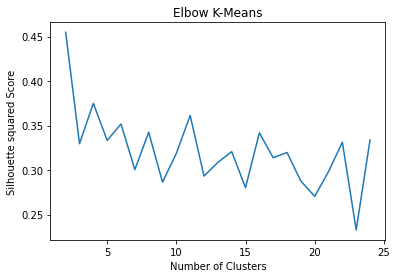

In [0]:
# Here is my elbow rule, from every cluster on 2 to 25 clusters 
# instanciating k means algorithm, recalling the name of column to take
# as input and the name of the cluster in the for loop, 
# fitting the model with the features vectorized and scaled.
# transforming the features to get the clusters results
# Then for every cluster nomber instanciating the evaluator 
# that in this case is the Silhouette squared score. 
# Applying the evaluator to the results and appending the results
# to a list. Outside the for loop after every cluster tried, plotting
# on a x axis, the number of plots and on y, the score obtained

sil_sq = []

for cluster in range(2,25):
  kmeans = KMeans(featuresCol="features").setK(cluster)
  model = kmeans.fit(features_input)
  results = model.transform(features_input)
  evaluator = ClusteringEvaluator()
  silhouette = evaluator.evaluate(results)
  sil_sq.append(silhouette)
  
plt.plot(range(2,25),sil_sq)
plt.title("Elbow K-Means")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette squared Score")
plt.show()

In [0]:
# After deciding the number of cluster to take, repiting
# the same step on the desired number of clusters, in order
# to get the results and the exactly silhouette score for that number
# of clusters

# Instanciating clustering evaluator 
# Instanciating the evaluation of the cluster by silhouette score

kmeans = KMeans(featuresCol="features").setK(11)
model = kmeans.fit(features_input)
results = model.transform(features_input)

evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(results)
print(f"A total of 11 clusters gives a solhouette result of: ", silhouette)

A total of 11 clusters gives a solhouette result of: 0.36133920438803463

In [0]:
# Here again adding a extra column to the predictions output and to the 
# frame which contain the name of the country and iso_code 
# Joinin framer as outer and dropping the extra column added to match the join
# Also, droping the features column, as result, country, iso code and results


results = results.withColumn("id", monotonically_increasing_id())
df_countries = df_countries.withColumn("id", monotonically_increasing_id())

df_cluster = df_countries.join(results,"id","outer").drop("id")
df_cluster =  df_cluster.drop("features")

In [0]:
df_cluster.show()

+-------------------+--------+----------+
 location|iso_code|prediction|
+-------------------+--------+----------+
 Afghanistan| AFG| 4|
 Albania| ALB| 10|
 Algeria| DZA| 1|
 Andorra| AND| 8|
 Angola| AGO| 1|
Antigua and Barbuda| ATG| 7|
 Argentina| ARG| 3|
 Armenia| ARM| 10|
 Australia| AUS| 7|
 Austria| AUT| 6|
 Azerbaijan| AZE| 4|
 Bahamas| BHS| 7|
 Bahrain| BHR| 2|
 Bangladesh| BGD| 10|
 Barbados| BRB| 7|
 Belarus| BLR| 4|
 Belgium| BEL| 8|
 Belize| BLZ| 7|
 Benin| BEN| 1|
 Bhutan| BTN| 7|
+-------------------+--------+----------+
only showing top 20 rows

In [0]:
# I couldn't plot map with databricks, is not reading iso codes, I will export tables
# and use tableau for further visualization

In [0]:
display(df_cluster)

location,iso_code,prediction
Afghanistan,AFG,4
Albania,ALB,10
Algeria,DZA,1
Andorra,AND,8
Angola,AGO,1
Antigua and Barbuda,ATG,7
Argentina,ARG,3
Armenia,ARM,10
Australia,AUS,7
Austria,AUT,6
